In [ ]:
library(car)      # includes Anova()
library(coin)     # includes Fisher Pitman Test 
library(gplots)    # necessary for plotmeans()
library(lmerTest)   # different p-value calculations for lmer()
library(lme4)      # includes lmer(), glmer()
library(nlme)     # includes lme()
library(pgirmess)   # permutation tests for lme(), lm() via PermTest()
library(predictmeans)  # residplot() ; permutation tests for lmer() via permanova.lmer()
library(sjPlot)        # plot_model()
library(performance)    # check_overdispersion(), check_collinearity() , r2_Nakagawa()
library(praise)          # ...
library(sjstats)   # overdisp()
library(lattice)
library(MASS)
library(pscl) # alternatively can use package ZIM for zero-inflated models
library(lmtest)
library(ggpubr)
library(ggplot2)
library(moments)
library(dplyr)
library(emmeans)
library(multcomp)
library(lsmeans)
library(MuMIn)
library(partR2)
library(effects)
library(sjPlot)
library(sjlabelled)
library(sjmisc)
library(scales)

In [35]:
library(ggplot2)



In [ ]:
data <- read.csv(file = '/Volumes/Macintosh HD/Documents/Vervet Monkey/V8_final files/csv files to upload/data.csv')

In [6]:
head(data)
str(data)

,Dyad,Group,ran_Id1,ran_Id2,Nb_dyad_points,Rank_diff,sex_sex,age_age,same_kin,CSI,CSI.0.04,CSI._Log
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>
1,Bela-Can,Noha,Bela,Can,71,9,fm,ja,0,0.74,0.78,-0.10790540
2,Bela-Cus,Noha,Cus,Bela,47,14,fm,ja,0,1.01,1.05,0.02118930
3,Bela-Gaya,Noha,Gaya,Bela,32,13,ff,ja,0,1.75,1.79,0.25285303
4,Bela-Gene,Noha,Bela,Gene,50,16,ff,ja,0,0.27,0.31,-0.50863831
5,Bela-Gran,Noha,Gran,Bela,39,15,ff,jj,0,1.21,1.25,0.09691001
6,Bela-Guat,Noha,Guat,Bela,21,11,ff,jj,0,0.47,0.51,-0.29242982


'data.frame':	429 obs. of  12 variables:
 $ Dyad          : Factor w/ 429 levels "Aara-Aare","Aara-Amur",..: 43 44 45 46 47 48 49 50 51 52 ...
 $ Group         : Factor w/ 2 levels "Kubu","Noha": 2 2 2 2 2 2 2 2 2 2 ...
 $ ran_Id1       : Factor w/ 40 levels "Aara","Aare",..: 5 7 8 5 10 11 13 18 5 5 ...
 $ ran_Id2       : Factor w/ 40 levels "Aara","Aare",..: 6 5 5 9 5 5 5 5 19 20 ...
 $ Nb_dyad_points: int  71 47 32 50 39 21 30 35 44 38 ...
 $ Rank_diff     : int  9 14 13 16 15 11 2 7 5 4 ...
 $ sex_sex       : Factor w/ 3 levels "ff","fm","mm": 2 2 1 1 1 1 1 1 1 2 ...
 $ age_age       : Factor w/ 3 levels "aa","ja","jj": 2 2 2 2 3 3 3 3 2 3 ...
 $ same_kin      : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CSI           : num  0.74 1.01 1.75 0.27 1.21 0.47 1.48 0.34 0.34 0.81 ...
 $ CSI.0.04      : num  0.78 1.05 1.79 0.31 1.25 0.51 1.52 0.38 0.38 0.85 ...
 $ CSI._Log      : num  -0.1079 0.0212 0.2529 -0.5086 0.0969 ...


# Model selection for CSI as outcome variable (accord. to different random factors)

In [7]:
log1=lme(CSI._Log~ 
           sex_sex+
           age_age+
           Group+
           Rank_diff,
         random=list(ran_Id1=~1, ran_Id2=~1),
         data)

In [8]:
summary(log1)

Warning message in pt(-abs(tVal), fDF):
“production de NaN”


Linear mixed-effects model fit by REML
 Data: data 
       AIC      BIC    logLik
  705.7278 746.1778 -342.8639

Random effects:
 Formula: ~1 | ran_Id1
        (Intercept)
StdDev:   0.1478544

 Formula: ~1 | ran_Id2 %in% ran_Id1
         (Intercept)  Residual
StdDev: 0.0001789074 0.5076957

Fixed effects: CSI._Log ~ sex_sex + age_age + Group + Rank_diff 
                 Value  Std.Error  DF   t-value p-value
(Intercept) -0.2535535 0.09333872 384 -2.716488  0.0069
sex_sexfm   -0.1150225 0.05839784 384 -1.969637  0.0496
sex_sexmm    0.1978036 0.08886282 384  2.225943  0.0266
age_ageja    0.1189715 0.06437313 384  1.848155  0.0653
age_agejj    0.5637195 0.08265467 384  6.820178  0.0000
GroupNoha   -0.0657550 0.08446027  38 -0.778531  0.4411
Rank_diff   -0.0294321 0.00436538   0 -6.742172     NaN
 Correlation: 
          (Intr) sx_sxf sx_sxm age_gj ag_gjj GropNh
sex_sexfm -0.278                                   
sex_sexmm -0.161  0.499                            
age_ageja -0.486 -0.074 

In [9]:
log1.1=lme(CSI._Log~ 
           sex_sex+
           age_age+
           Group+
           Rank_diff,
         random=list(ran_Id1=~1),
         data)
summary(log1.1)

Linear mixed-effects model fit by REML
 Data: data 
       AIC      BIC    logLik
  703.7278 740.1328 -342.8639

Random effects:
 Formula: ~1 | ran_Id1
        (Intercept)  Residual
StdDev:   0.1478544 0.5076958

Fixed effects: CSI._Log ~ sex_sex + age_age + Group + Rank_diff 
                 Value  Std.Error  DF   t-value p-value
(Intercept) -0.2535535 0.09333873 384 -2.716488  0.0069
sex_sexfm   -0.1150225 0.05839784 384 -1.969637  0.0496
sex_sexmm    0.1978036 0.08886282 384  2.225943  0.0266
age_ageja    0.1189715 0.06437313 384  1.848155  0.0653
age_agejj    0.5637195 0.08265467 384  6.820178  0.0000
GroupNoha   -0.0657550 0.08446028  38 -0.778531  0.4411
Rank_diff   -0.0294321 0.00436538 384 -6.742172  0.0000
 Correlation: 
          (Intr) sx_sxf sx_sxm age_gj ag_gjj GropNh
sex_sexfm -0.278                                   
sex_sexmm -0.161  0.499                            
age_ageja -0.486 -0.074 -0.080                     
age_agejj -0.438 -0.114 -0.097  0.633              

In [10]:
r.squaredGLMM(log1.1)

Warning message:
“'r.squaredGLMM' now calculates a revised statistic. See the help page.”


R2m,R2c
0.2515633,0.3100776


In [11]:
log1.2=lme(CSI._Log~ 
             sex_sex+
             age_age+
             Group+
             Rank_diff,
           random=list(ran_Id2=~1),
           data)
summary(log1.2)

Linear mixed-effects model fit by REML
 Data: data 
       AIC      BIC    logLik
  697.0233 733.4283 -339.5116

Random effects:
 Formula: ~1 | ran_Id2
        (Intercept)  Residual
StdDev:   0.1688277 0.5004447

Fixed effects: CSI._Log ~ sex_sex + age_age + Group + Rank_diff 
                 Value  Std.Error  DF   t-value p-value
(Intercept) -0.2121678 0.09564166 384 -2.218361  0.0271
sex_sexfm   -0.1724026 0.05863662 384 -2.940187  0.0035
sex_sexmm    0.1562373 0.09020165 384  1.732089  0.0841
age_ageja    0.1167557 0.06373825 384  1.831799  0.0678
age_agejj    0.5512535 0.08386223 384  6.573323  0.0000
GroupNoha   -0.0440150 0.08807796  38 -0.499728  0.6201
Rank_diff   -0.0310614 0.00434956 384 -7.141271  0.0000
 Correlation: 
          (Intr) sx_sxf sx_sxm age_gj ag_gjj GropNh
sex_sexfm -0.299                                   
sex_sexmm -0.160  0.523                            
age_ageja -0.469 -0.048 -0.098                     
age_agejj -0.413 -0.103 -0.160  0.636              

In [12]:
anova(log1, log1.1, log1.2)


,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
log1,"lme.formula(fixed = CSI._Log ~ sex_sex + age_age + Group + Rank_diff, data = data, random = list(ran_Id1 = ~1, ran_Id2 = ~1))",1,10,705.7278,746.1778,-342.8639,,NA,NA
log1.1,"lme.formula(fixed = CSI._Log ~ sex_sex + age_age + Group + Rank_diff, data = data, random = list(ran_Id1 = ~1))",2,9,703.7278,740.1328,-342.8639,1 vs 2,1.195274e-07,0.9997241
log1.2,"lme.formula(fixed = CSI._Log ~ sex_sex + age_age + Group + Rank_diff, data = data, random = list(ran_Id2 = ~1))",3,9,697.0233,733.4283,-339.5116,,NA,NA


In [13]:
log2.0=lme(CSI._Log~ 
             sex_sex+
             age_age+
             same_kin+
             sex_sex*age_age+
             Rank_diff*age_age+
             Rank_diff+Group,
           random=list(ran_Id1=~1),
           data)
Anova(log2.0, Type="3")

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
sex_sex,20.5997163,2,3.363787e-05
age_age,59.3489794,2,1.295785e-13
same_kin,36.5501475,1,1.487887e-09
Rank_diff,22.0120467,1,2.709445e-06
Group,0.5621876,1,4.533802e-01
sex_sex:age_age,39.0811532,4,6.702673e-08
age_age:Rank_diff,0.6284290,2,7.303623e-01


In [14]:
r.squaredGLMM(log2.0)


R2m,R2c
0.3495554,0.4311205


In [15]:
log2.1plus2=lme(CSI._Log~ 
           sex_sex+
           age_age+
           sex_sex*age_age+
           Rank_diff,
         random=list(ran_Id1=~1,ran_Id2=~1),
         data)
Anova(log2.1plus2, Type="3")

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
sex_sex,18.73341,2,8.552460e-05
age_age,60.58364,2,6.989227e-14
Rank_diff,49.76932,1,1.729272e-12
sex_sex:age_age,36.27624,4,2.538715e-07


In [16]:
log2.2=lme(CSI._Log~ 
           sex_sex+
           age_age+
           sex_sex*age_age+
           Rank_diff,
         random=list(ran_Id2=~1),
         data)
Anova(log2.2, Type="3")


,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
sex_sex,24.31462,2,5.249860e-06
age_age,57.23117,2,3.736012e-13
Rank_diff,54.63706,1,1.449757e-13
sex_sex:age_age,27.87655,4,1.321250e-05


In [17]:
log2.1=lme(CSI._Log~ 
             sex_sex+
             age_age+
             sex_sex*age_age+
             Rank_diff,
             random=list(ran_Id1=~1),
           data)
Anova(log2.1, Type="3")

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
sex_sex,18.73341,2,8.552460e-05
age_age,60.58364,2,6.989230e-14
Rank_diff,49.76932,1,1.729272e-12
sex_sex:age_age,36.27624,4,2.538714e-07


In [18]:
log2_lm=lm(CSI._Log~ 
           sex_sex+
           age_age+
           sex_sex*age_age+
           Rank_diff,
         data)
Anova(log2_lm, Type="3")


,Sum Sq,Df,F value,Pr(>F)
,<dbl>,<dbl>,<dbl>,<dbl>
sex_sex,5.284194,2,10.104715,5.177567e-05
age_age,18.463628,2,35.307127,6.751709e-15
Rank_diff,14.018270,1,53.612955,1.260033e-12
sex_sex:age_age,8.268631,4,7.905857,3.765402e-06
Residuals,109.556639,419,NA,NA


In [19]:
anova(log2.1, log2.1plus2, log2.2, log2_lm)


,call,Model,df,AIC,BIC,logLik,Test,L.Ratio,p-value
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>
log2.1,"lme.formula(fixed = CSI._Log ~ sex_sex + age_age + sex_sex * age_age + Rank_diff, data = data, random = list(ran_Id1 = ~1))",1,12,680.2656,728.7201,-328.1328,,NA,NA
log2.1plus2,"lme.formula(fixed = CSI._Log ~ sex_sex + age_age + sex_sex * age_age + Rank_diff, data = data, random = list(ran_Id1 = ~1, ran_Id2 = ~1))",2,13,682.2656,734.7580,-328.1328,1 vs 2,4.112817e-07,0.9994883067
log2.2,"lme.formula(fixed = CSI._Log ~ sex_sex + age_age + sex_sex * age_age + Rank_diff, data = data, random = list(ran_Id2 = ~1))",3,12,681.0184,729.4729,-328.5092,2 vs 3,7.527653e-01,0.3856021228
log2_lm,"lm(formula = CSI._Log ~ sex_sex + age_age + sex_sex * age_age + Rank_diff, data = data)",4,11,691.4993,735.9158,-334.7496,3 vs 4,1.248086e+01,0.0004111419


# using log2.1 as our final model

In [ ]:
# the model including only ran_Id1 resulted in the lowest AIC

Cus Pru 
 60 237

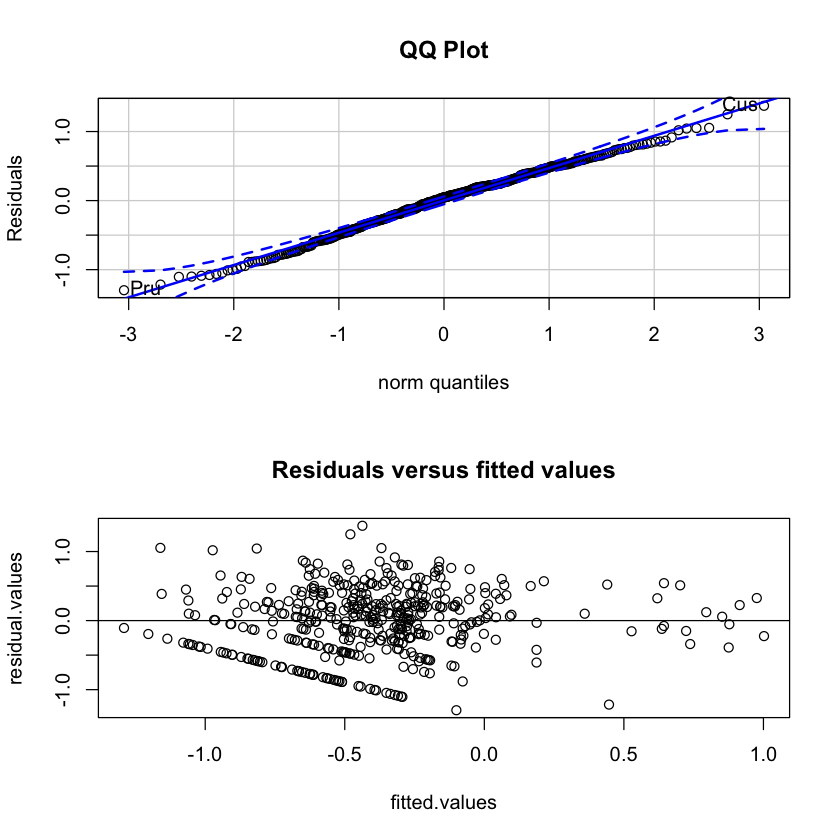

In [21]:
par(mfrow=c(2,1))

qqPlot(residuals(log2.1),ylab="Residuals", main="QQ Plot")
fitted.values=fitted(log2.1)
residual.values=residuals(log2.1)
plot(residual.values~fitted.values, main="Residuals versus fitted values")
abline(mean(residual.values),0)

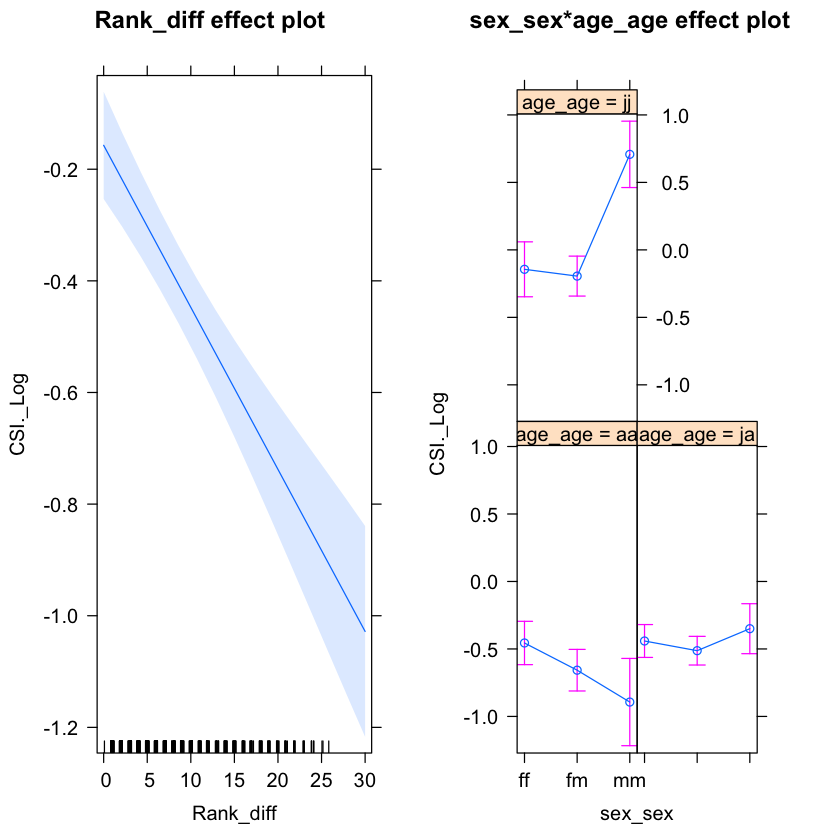

In [22]:
plot(allEffects(log2.1))

In [ ]:
#Visualize relationship between rank diff. and CSI

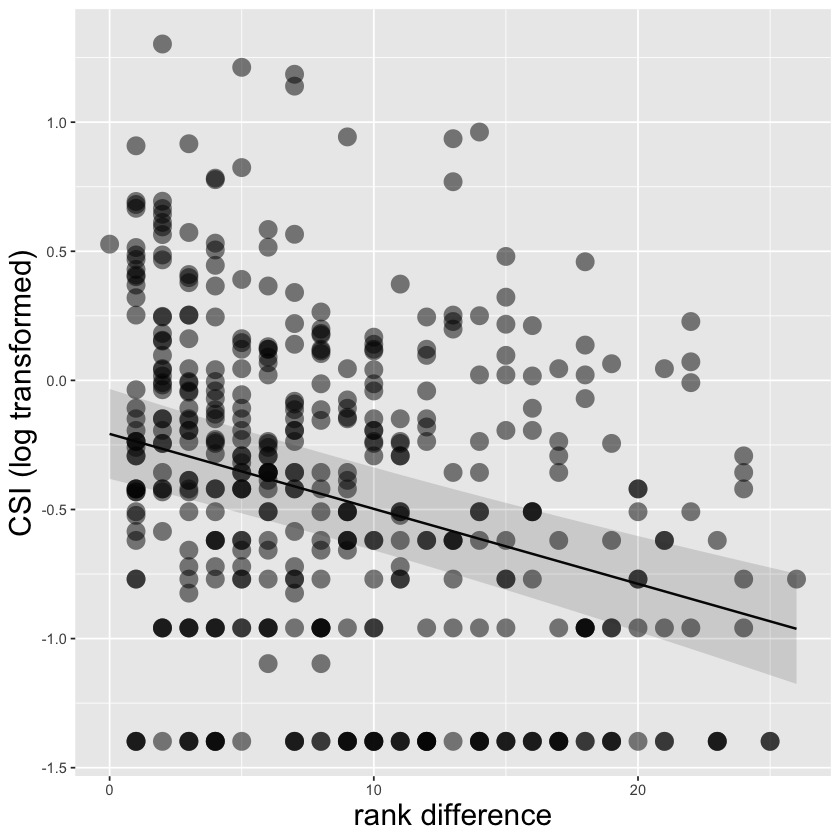

In [23]:
p2=plot_model(log2.1, terms=c("Rank_diff [all]"), type="pred", show.scatter=T, dot.size = 5,  remove.estimates = T, show.data = T) +labs(x="rank difference", y="CSI (log transformed)") + ggtitle(NULL)
p2+font("xlab", size = 18, color = "black")+font("ylab", size = 18, color = "black")


In [ ]:
#visualize sex*age interaction

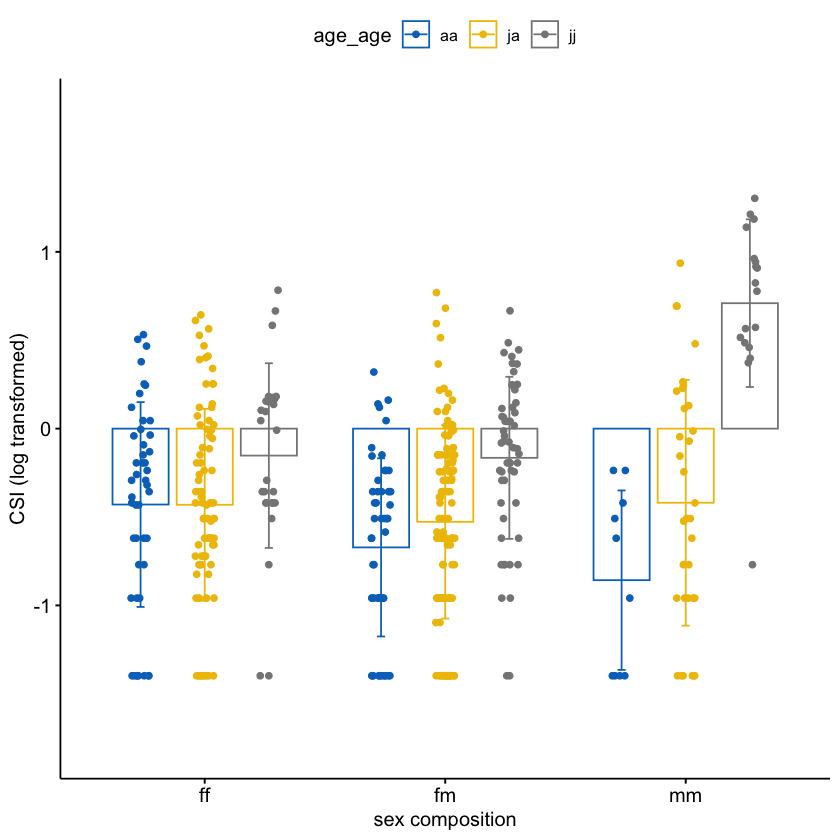

In [26]:
sp2<-ggbarplot(data, x = "sex_sex", y = "CSI._Log", 
               add = c("mean_sd", "jitter"),
               color = "age_age", alpha=0.6, palette = "jco",
               position = position_dodge(0.8), xlab="sex composition", ylab="CSI (log transformed)", lab.size=8, xlab.size=8, ylab.size=8, x.scale=c("FF", "FM", "MM", size=6), y.scale=c(size=6) , ylim=c(-1.8, 1.8))

sp2

# GLMMS for Spatial associations

In [ ]:
# procedure: (1)run the GLMM  ; (2)check overdispersion ; (3)posthoc tests

# Feeding

# GLMM: Proximity (<5m) during Feeding 

In [17]:
feeding <- read.csv(file = '/Volumes/Macintosh HD/Documents/Vervet Monkey/V8_final files/csv files to upload/Feeding_1.csv')


ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : more columns than column names


In [28]:
str(feeding)

'data.frame':	429 obs. of  32 variables:
 $ Dyad                      : Factor w/ 429 levels "Aara-Aare","Aara-Amur",..: 43 44 45 46 47 48 49 50 51 52 ...
 $ Group                     : Factor w/ 2 levels "Kubu","Noha": 2 2 2 2 2 2 2 2 2 2 ...
 $ ran_Id1                   : Factor w/ 40 levels "Aara","Aare",..: 5 7 5 5 5 5 13 5 19 20 ...
 $ ran_Id2                   : Factor w/ 40 levels "Aara","Aare",..: 6 5 8 9 10 11 5 18 5 5 ...
 $ Nb_dyad_points            : int  124 123 142 135 134 154 147 149 141 137 ...
 $ Rank_diff                 : int  9 14 13 16 15 11 2 7 5 4 ...
 $ sex_sex                   : Factor w/ 3 levels "ff","fm","mm": 2 2 1 1 1 1 1 1 1 2 ...
 $ age_age                   : Factor w/ 3 levels "aa","ja","jj": 2 2 2 2 3 3 3 3 2 3 ...
 $ same_kin                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CSI                       : num  0.74 1.01 1.75 0.27 1.21 0.47 1.48 0.34 0.34 0.81 ...
 $ CSI.0.04                  : num  0.78 1.05 1.79 0.31 1.25 0.51 1.52 0.38 0.38 0.85 ...

In [ ]:
# for comparisons between Ben Bolker's method and OLRE for correcting overdispersion
# see the original script 

In [29]:
obs<-seq(nrow(feeding))
OLRE_feed_prox<-glmer(cbind(Nb_prox,Nb_non_prox)~CSI+
                       sex_sex+
                       age_age+
                       Group+
                       Rank_diff+
                       (1|ran_Id1)+(1|obs),nAGQ=0,data=feeding,family="binomial")
summary(OLRE_feed_prox)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: feeding

     AIC      BIC   logLik deviance df.resid 
  2366.5   2407.1  -1173.2   2346.5      419 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.71302 -0.57626 -0.05972  0.42841  1.73067 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.15394  0.3923  
 ran_Id1 (Intercept) 0.07609  0.2758  
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.503112   0.121988 -28.717  < 2e-16 ***
CSI          0.065262   0.015147   4.309 1.64e-05 ***
sex_sexfm    0.153562   0.070235   2.186  0.02878 *  
sex_sexmm   -0.086512   0.114548  -0.755  0.45010    
age_ageja    0.077326   0.076799   1.007  0.3

In [30]:
overdisp_fun(OLRE_feed_prox)


chisq       ratio         rdf           p 
200.5181247   0.4785635 419.0000000   1.0000000

In [31]:
Anova(OLRE_feed_prox,Type="2")

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
CSI,18.563590,1,1.643294e-05
sex_sex,9.824155,2,7.357188e-03
age_age,12.535309,2,1.896672e-03
Group,53.868257,1,2.143936e-13
Rank_diff,10.688722,1,1.077906e-03


In [32]:
drop1(OLRE_feed_prox, test="Chisq") #very similar results


,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,2366.489,NA,NA
CSI,1,2382.994,18.50506,1.694542e-05
sex_sex,2,2372.495,10.00628,6.716812e-03
age_age,2,2375.334,12.84521,1.624419e-03
Group,1,2399.282,34.79355,3.665865e-09
Rank_diff,1,2375.459,10.97054,9.257192e-04


In [33]:
summary(glht(OLRE_feed_prox,linfct=mcp(sex_sex="Tukey")), Chisqtest())



	 General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Linear Hypotheses:
             Estimate
fm - ff == 0  0.15356
mm - ff == 0 -0.08651
mm - fm == 0 -0.24007

Global Test:
  Chisq DF Pr(>Chisq)
1 9.824  2   0.007357

In [34]:
summary(glht(OLRE_feed_prox,linfct=mcp(age_age="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)   
ja - aa == 0  0.07733    0.07680   1.007   0.5631   
jj - aa == 0  0.32257    0.10174   3.170   0.0041 **
jj - ja == 0  0.24524    0.07484   3.277   0.0030 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [37]:
summary(glht(OLRE_feed_prox,linfct=mcp(Group="Tukey")))


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0  -0.8603     0.1172  -7.339 2.14e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [38]:
r.squaredGLMM(OLRE_feed_prox)

Warning message:
“The null model is correct only if all variables used by the original model remain unchanged.”


,R2m,R2c
theoretical,0.4549597,0.9815974
delta,0.3695720,0.7973693


# GLMM+OLRE prox. within AL during feeding 

In [39]:
obs<-seq(nrow(feeding))
OLRE_feed_AL<-glmer(cbind(Nb_Foc_pt_arm_length,Nb_no_al)~CSI+
                        sex_sex+
                        age_age+
                        Group+
                        Rank_diff+
                        (1|ran_Id1)+(1|obs),nAGQ=0,data=feeding,family="binomial")
summary(OLRE_feed_AL)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_Foc_pt_arm_length, Nb_no_al) ~ CSI + sex_sex + age_age +  
    Group + Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: feeding

     AIC      BIC   logLik deviance df.resid 
   373.9    414.5   -177.0    353.9      419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-0.7226 -0.3705 -0.3084 -0.2027  9.5054 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.6644   0.8151  
 ran_Id1 (Intercept) 0.2595   0.5094  
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -6.02748    0.45857 -13.144   <2e-16 ***
CSI          0.20221    0.08294   2.438   0.0148 *  
sex_sexfm   -0.03880    0.30218  -0.128   0.8978    
sex_sexmm   -2.60054    1.06717  -2.437   0.0148 *  
age_ageja   -0.08561    0.36959  -0.232   0.8168  

In [42]:
overdisp_fun(OLRE_feed_AL)


chisq       ratio         rdf           p 
245.0652798   0.5848813 419.0000000   1.0000000

In [40]:
drop1(OLRE_feed_AL, test="Chisq") 

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,373.9035,NA,NA
CSI,1,377.7576,5.8541102,0.015540713
sex_sex,2,381.2791,11.3756030,0.003387031
age_age,2,370.0248,0.1212581,0.941172319
Group,1,374.0077,2.1041529,0.146899672
Rank_diff,1,377.0133,5.1098176,0.023790821


In [41]:
summary(glht(OLRE_feed_AL,linfct=mcp(sex_sex="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Foc_pt_arm_length, Nb_no_al) ~ CSI + 
    sex_sex + age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | 
    obs), data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)  
fm - ff == 0  -0.0388     0.3022  -0.128   0.9902  
mm - ff == 0  -2.6005     1.0672  -2.437   0.0339 *
mm - fm == 0  -2.5617     1.0660  -2.403   0.0367 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# AL~2M feeding

In [43]:
OLRE_feed_2m<-glmer(cbind(Nb_Foc_pt_2m,Nb_no_2m)~CSI+
                      sex_sex+
                      age_age+
                      Group+
                      Rank_diff+
                      (1|ran_Id1)+(1|obs),nAGQ=0,data=feeding,family="binomial")
summary(OLRE_feed_2m)
drop1(OLRE_feed_2m, test="Chisq") 

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_Foc_pt_2m, Nb_no_2m) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: feeding

     AIC      BIC   logLik deviance df.resid 
  1563.4   1604.1   -771.7   1543.4      419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5360 -0.7498 -0.1674  0.4217  1.8946 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.2613   0.5112  
 ran_Id1 (Intercept) 0.1125   0.3354  
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.626838   0.175097 -20.713  < 2e-16 ***
CSI          0.083286   0.023660   3.520 0.000431 ***
sex_sexfm    0.265224   0.110748   2.395 0.016628 *  
sex_sexmm   -0.050026   0.180745  -0.277 0.781952    
age_ageja   -0.106732   0.121802  -0.876 0.380881    

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,1563.436,NA,NA
CSI,1,1573.815,12.379629,4.340433e-04
sex_sex,2,1568.354,8.918221,1.157265e-02
age_age,2,1563.874,4.438079,1.087135e-01
Group,1,1583.651,22.215168,2.437406e-06
Rank_diff,1,1568.276,6.840339,8.912194e-03


In [45]:
overdisp_fun(OLRE_feed_2m)


chisq       ratio         rdf           p 
230.9409388   0.5511717 419.0000000   1.0000000

In [44]:
summary(glht(OLRE_feed_2m,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Foc_pt_2m, Nb_no_2m) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0  -0.8709     0.1592  -5.469 4.53e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# AL+2M (=<2M) during Feeding (what interests us)

In [46]:
OLRE_feed_w2m<-glmer(cbind(Nb_.2M,Nb_non_.2M)~CSI+
                      sex_sex+
                      age_age+
                      Group+
                      Rank_diff+
                      (1|ran_Id1)+(1|obs),nAGQ=0,data=feeding,family="binomial")
summary(OLRE_feed_w2m)
drop1(OLRE_feed_w2m, test="Chisq") 

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_.2M, Nb_non_.2M) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: feeding

     AIC      BIC   logLik deviance df.resid 
  1611.7   1652.3   -795.8   1591.7      419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5544 -0.7662 -0.1674  0.4352  1.7015 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.2721   0.5217  
 ran_Id1 (Intercept) 0.1055   0.3248  
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.230499   0.171654 -24.645  < 2e-16 ***
CSI          0.086209   0.023519   3.666 0.000247 ***
sex_sexfm    0.249758   0.108677   2.298 0.021553 *  
sex_sexmm   -0.120233   0.178883  -0.672 0.501500    
age_ageja   -0.114389   0.119834  -0.955 0.339796    
age

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,1611.693,NA,NA
CSI,1,1623.127,13.434092,2.470926e-04
sex_sex,2,1617.631,9.938003,6.950086e-03
age_age,2,1611.549,3.856241,1.454212e-01
Group,1,1632.001,22.308150,2.322190e-06
Rank_diff,1,1618.814,9.120847,2.527130e-03


In [47]:
summary(glht(OLRE_feed_w2m,linfct=mcp(sex_sex="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_.2M, Nb_non_.2M) ~ CSI + sex_sex + age_age + 
    Group + Rank_diff + (1 | ran_Id1) + (1 | obs), data = feeding, 
    family = "binomial", nAGQ = 0)

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)  
fm - ff == 0   0.2498     0.1087   2.298   0.0533 .
mm - ff == 0  -0.1202     0.1789  -0.672   0.7732  
mm - fm == 0  -0.3700     0.1573  -2.352   0.0465 *
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [48]:
summary(glht(OLRE_feed_w2m,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_.2M, Nb_non_.2M) ~ CSI + sex_sex + age_age + 
    Group + Rank_diff + (1 | ran_Id1) + (1 | obs), data = feeding, 
    family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0  -0.8491     0.1556  -5.458 4.83e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# Visualize proximity < 2m~CSI (feeding)

ERROR: Error in eval(predvars, data, env): object 'sex_sex' not found


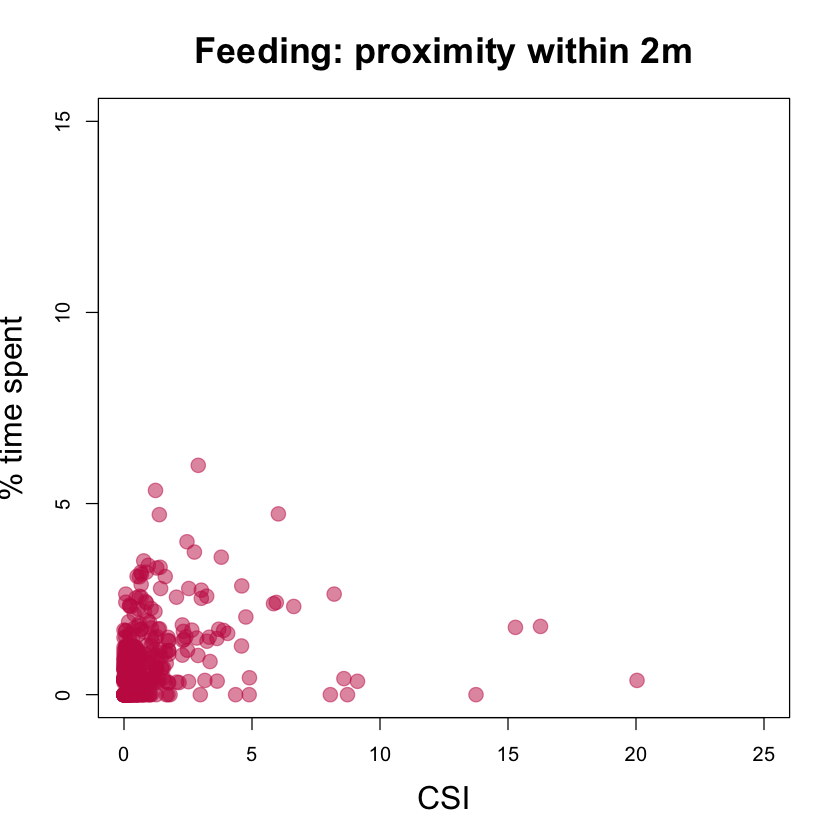

In [14]:
plot(Percent_.2m~CSI,  feeding, col = "#c7225380", main="Feeding: proximity within 2m", cex.main=1.8, cex=1.6, ylab="% time spent", cex.lab=1.6,pch=19, xlim=c(0,25), ylim=c(0,15))
curve(predict(OLRE_feed_prox,data.frame(CSI=x),type="response"), 
      lty=1, lwd=2, col="blue",                            
      add=TRUE)

# 2M~5M during Feeding

In [49]:
OLRE_feed_5m<-glmer(cbind(Nb_Foc_pt_5m,Nb_no_5m)~CSI+
                      sex_sex+
                      age_age+
                      Group+
                      Rank_diff+
                      (1|ran_Id1)+(1|obs),nAGQ=0,data=feeding,family="binomial")
summary(OLRE_feed_5m)
drop1(OLRE_feed_5m, test="Chisq") 

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_Foc_pt_5m, Nb_no_5m) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: feeding

     AIC      BIC   logLik deviance df.resid 
  2129.9   2170.5  -1054.9   2109.9      419 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.72412 -0.65748 -0.05023  0.47605  1.73705 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.15077  0.3883  
 ran_Id1 (Intercept) 0.06036  0.2457  
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.736155   0.122446 -22.346  < 2e-16 ***
CSI          0.056866   0.016112   3.529 0.000417 ***
sex_sexfm    0.108644   0.074517   1.458 0.144844    
sex_sexmm   -0.070995   0.121534  -0.584 0.559112    
age_ageja    0.154371   0.083086   1.858 0.

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,2129.895,NA,NA
CSI,1,2140.376,12.480445,4.112342e-04
sex_sex,2,2130.431,4.535737,1.035326e-01
age_age,2,2141.845,15.949647,3.440156e-04
Group,1,2166.621,38.725731,4.877370e-10
Rank_diff,1,2134.420,6.524390,1.064050e-02


In [52]:
overdisp_fun(OLRE_feed_5m)


chisq       ratio         rdf           p 
233.6129925   0.5575489 419.0000000   1.0000000

In [50]:
summary(glht(OLRE_feed_5m,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Foc_pt_5m, Nb_no_5m) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0  -0.8887     0.1126  -7.892 2.89e-15 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [51]:
summary(glht(OLRE_feed_5m,linfct=mcp(age_age="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Foc_pt_5m, Nb_no_5m) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)    
ja - aa == 0  0.15437    0.08309   1.858  0.14610    
jj - aa == 0  0.41207    0.10763   3.828  < 0.001 ***
jj - ja == 0  0.25770    0.07981   3.229  0.00346 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# visualize: 2m-5m (feeding)

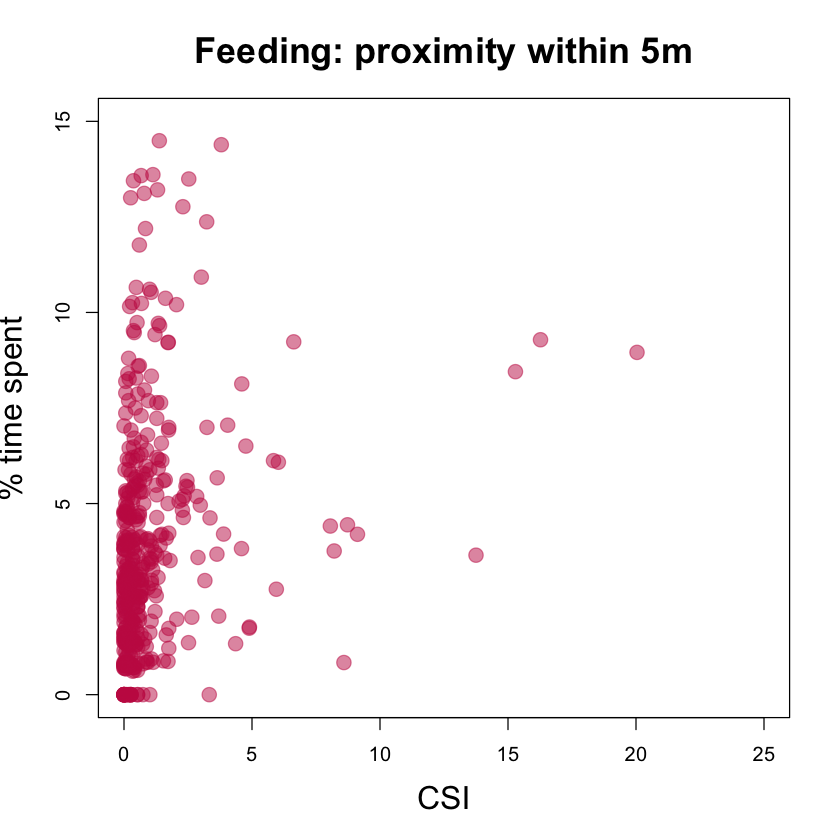

In [27]:
feeding$Percent_5m<- with(feeding, (Nb_Foc_pt_5m/(Nb_Foc_pt_5m+Nb_no_5m))*100)

plot(Percent_5m~CSI,  feeding, col = "#c7225380", main="Feeding: proximity within 5m", cex.main=1.8, cex=1.6, ylab="% time spent", cex.lab=1.6,pch=19, xlim=c(0,25), ylim=c(0,15))


# Feeding: nearest neighbor

In [55]:
OLRE_feed_nbr<-glmer(cbind(Nb_Nearest_Id,Nb_no_nbr)~CSI+
                sex_sex+
                age_age+
                Group+

                Rank_diff+
                (1|ran_Id1)+(1|obs),nAGQ=0,data=feeding,family="binomial")

summary(OLRE_feed_nbr)

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_Nearest_Id, Nb_no_nbr) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: feeding

     AIC      BIC   logLik deviance df.resid 
  2574.5   2615.1  -1277.2   2554.5      419 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.87714 -0.51009  0.00092  0.35962  1.38863 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.15944  0.3993  
 ran_Id1 (Intercept) 0.01257  0.1121  
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.686959   0.088708 -19.017  < 2e-16 ***
CSI          0.064184   0.014409   4.454 8.41e-06 ***
sex_sexfm    0.023454   0.059071   0.397    0.691    
sex_sexmm   -0.127098   0.094947  -1.339    0.181    
age_ageja   -0.104620   0.065626  -1.594 

In [56]:
overdisp_fun(OLRE_feed_nbr)


chisq       ratio         rdf           p 
181.1040327   0.4322292 419.0000000   1.0000000

In [57]:
Anova(OLRE_feed_nbr,Type="2")
drop1(OLRE_feed_nbr, test="Chisq")



,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
CSI,19.842103,1,8.410947e-06
sex_sex,2.896146,2,2.350227e-01
age_age,2.541555,2,2.806134e-01
Group,119.080700,1,1.005542e-27
Rank_diff,15.251389,1,9.410752e-05


,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,2574.475,NA,NA
CSI,1,2591.906,19.430812,1.043106e-05
sex_sex,2,2573.524,3.049463,2.176795e-01
age_age,2,2573.007,2.531751,2.819923e-01
Group,1,2630.261,57.785827,2.922680e-14
Rank_diff,1,2587.967,15.492247,8.284437e-05


In [60]:
summary(glht(OLRE_feed_nbr,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Nearest_Id, Nb_no_nbr) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = feeding, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0 -0.83468    0.07649  -10.91   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# visualize nearest neighbor~CSI (feeding)

In [19]:
str(feeding)

'data.frame':	429 obs. of  32 variables:
 $ Dyad                      : Factor w/ 429 levels "Aara-Aare","Aara-Amur",..: 43 44 45 46 47 48 49 50 51 52 ...
 $ Group                     : Factor w/ 2 levels "Kubu","Noha": 2 2 2 2 2 2 2 2 2 2 ...
 $ ran_Id1                   : Factor w/ 40 levels "Aara","Aare",..: 5 7 5 5 5 5 13 5 19 20 ...
 $ ran_Id2                   : Factor w/ 40 levels "Aara","Aare",..: 6 5 8 9 10 11 5 18 5 5 ...
 $ Nb_dyad_points            : int  124 123 142 135 134 154 147 149 141 137 ...
 $ Rank_diff                 : int  9 14 13 16 15 11 2 7 5 4 ...
 $ sex_sex                   : Factor w/ 3 levels "ff","fm","mm": 2 2 1 1 1 1 1 1 1 2 ...
 $ age_age                   : Factor w/ 3 levels "aa","ja","jj": 2 2 2 2 3 3 3 3 2 3 ...
 $ same_kin                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CSI                       : num  0.74 1.01 1.75 0.27 1.21 0.47 1.48 0.34 0.34 0.81 ...
 $ CSI.0.04                  : num  0.78 1.05 1.79 0.31 1.25 0.51 1.52 0.38 0.38 0.85 ...

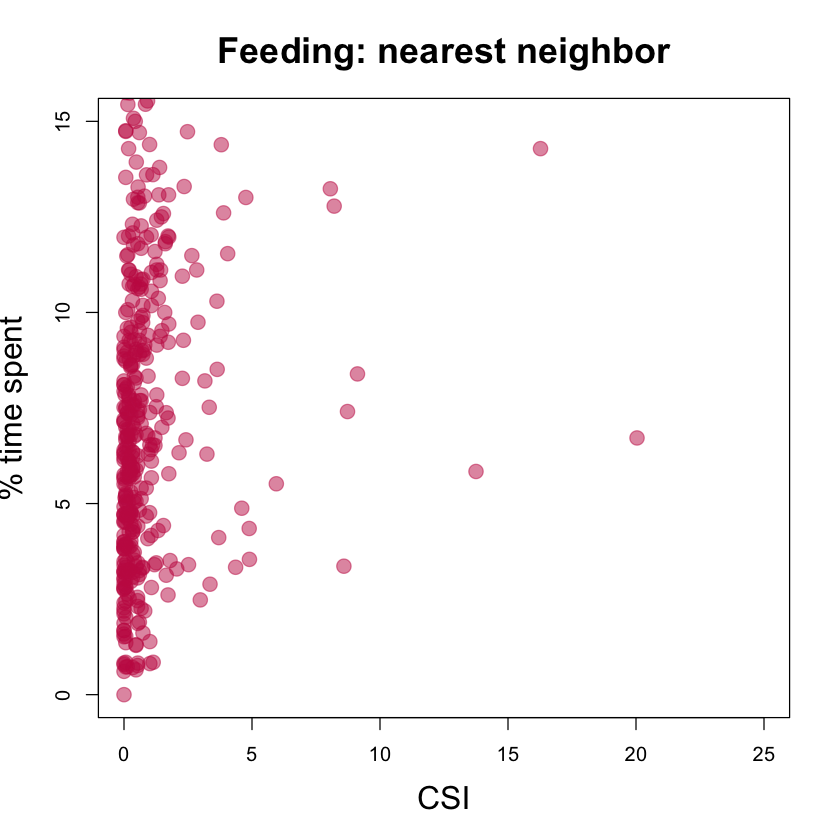

In [28]:
plot(Percent_nbr~CSI,  feeding, col = "#c7225380", main="Feeding: nearest neighbor", cex.main=1.8, cex=1.6, ylab="% time spent", cex.lab=1.6,pch=19, xlim=c(0,25), ylim=c(0,15))


# GLMMs Resting 

In [ ]:
# for comparisons bt. Ben Bolker's and OLRE methods, see the original script

In [61]:
resting <- read.csv(file = '/Volumes/Macintosh HD/Documents/Vervet Monkey/V8_final files/csv files to upload/resting.csv')

Warning message in file(file, "rt"):
“impossible d'ouvrir le fichier '/Volumes/Macintosh HD/Documents/Vervet Monkey/V8_final files/csv files to upload/resting.csv' : No such file or directory”


ERROR: Error in file(file, "rt"): impossible d'ouvrir la connexion


In [62]:
head(resting)

,Dyad,Group,ran_Id1,ran_Id2,Nb_dyad_points,Rank_diff,sex_sex,age_age,same_kin,CSI,⋯,Nb_prox,Nb_non_prox,Nb_beyondAL,Nb_non_beyondAL,Prop_prox,Percent_prox,Prop_nbr,Percent_nbr,Prop_beyondAL,Percent_beyondAL
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bela-Can,Noha,Bela,Can,71,9,fm,ja,0,0.74,⋯,0,213,0,142,0.00000000,0.000000,0.07042253,7.042254,0.00000000,0.000000
2,Bela-Cus,Noha,Cus,Bela,47,14,fm,ja,0,1.01,⋯,5,136,2,92,0.03546099,3.546099,0.06382979,6.382979,0.02127660,2.127660
3,Bela-Gaya,Noha,Gaya,Bela,32,13,ff,ja,0,1.75,⋯,1,95,1,63,0.01041667,1.041667,0.00000000,0.000000,0.01562500,1.562500
4,Bela-Gene,Noha,Bela,Gene,50,16,ff,ja,0,0.27,⋯,0,150,0,100,0.00000000,0.000000,0.04000000,4.000000,0.00000000,0.000000
5,Bela-Gran,Noha,Gran,Bela,39,15,ff,jj,0,1.21,⋯,6,111,6,72,0.05128205,5.128205,0.10256410,10.256410,0.07692308,7.692308
6,Bela-Guat,Noha,Guat,Bela,21,11,ff,jj,0,0.47,⋯,1,62,1,41,0.01587302,1.587302,0.09523809,9.523810,0.02380952,2.380952


In [63]:
obs_r<-seq(nrow(resting))
OLRE_rest_prox<-glmer(cbind(Nb_prox,Nb_non_prox)~CSI+
                        sex_sex+
                        age_age+
                        Group+
                        Rank_diff+
                        (1|ran_Id1)+(1|obs_r),nAGQ=0,data=resting,family="binomial")
overdisp_fun(OLRE_rest_prox)

chisq       ratio         rdf           p 
204.5552614   0.4881987 419.0000000   1.0000000

In [64]:
summary(OLRE_rest_prox)


Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs_r)
   Data: resting

     AIC      BIC   logLik deviance df.resid 
  1823.6   1864.2   -901.8   1803.6      419 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-1.48415 -0.63070 -0.06006  0.38243  1.41481 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs_r   (Intercept) 0.36499  0.6041  
 ran_Id1 (Intercept) 0.02598  0.1612  
Number of obs: 429, groups:  obs_r, 429; ran_Id1, 40

Fixed effects:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) -4.01108    0.15329 -26.167  < 2e-16 ***
CSI          0.07451    0.02198   3.390 0.000699 ***
sex_sexfm   -0.02625    0.10063  -0.261 0.794207    
sex_sexmm   -0.14735    0.15123  -0.974 0.329878    
age_ageja    0.36172    0.11281   3.207 0.0013

In [65]:
summary(glht(OLRE_rest_prox,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs_r), 
    data = resting, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)   
Noha - Kubu == 0  -0.3898     0.1287  -3.029  0.00246 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [66]:
r.squaredGLMM(OLRE_rest_prox)


Warning message:
“The null model is correct only if all variables used by the original model remain unchanged.”


,R2m,R2c
theoretical,0.3379560,0.9678626
delta,0.2356097,0.6747558


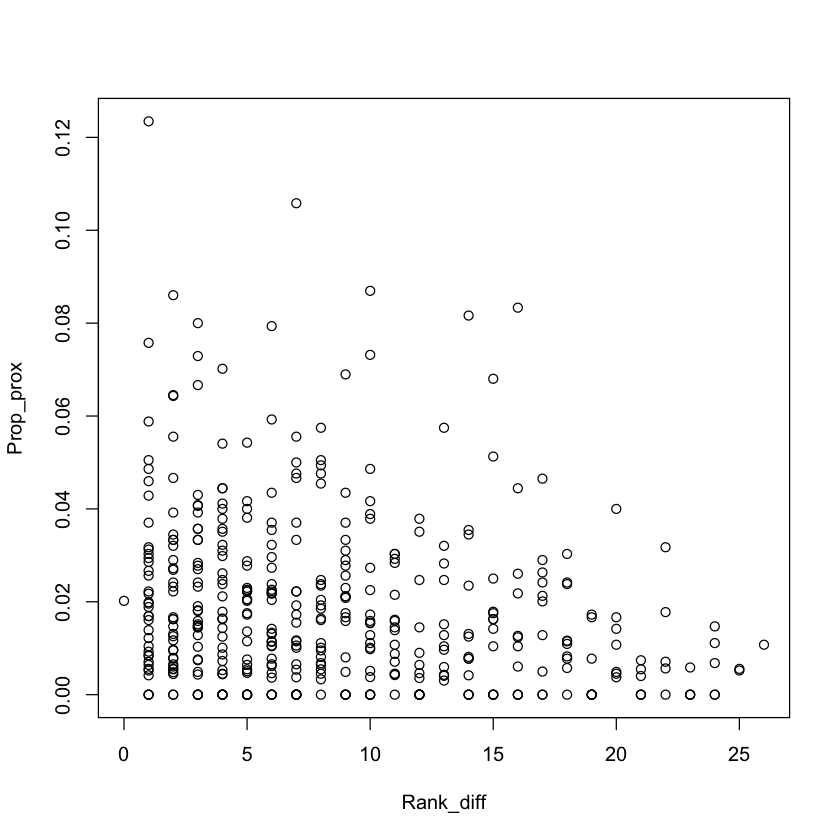

In [67]:
plot(Prop_prox~Rank_diff, resting)


#  resting within Arm Length (AL) - what interests us

In [76]:
obs_r<-seq(nrow(resting))
OLRE_rest_AL<-glmer(cbind(Nb_Foc_pt_arm_length,Nb_no_al)~CSI+
                       sex_sex+
                       age_age+
                       Group+
                       Rank_diff+
                       (1|ran_Id1)+(1|obs),nAGQ=0,data=resting,family="binomial")

drop1(OLRE_rest_AL, test="Chisq")

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,474.3812,NA,NA
CSI,1,491.0949,18.7137391,1.518842e-05
sex_sex,2,474.3490,3.9678495,1.375284e-01
age_age,2,472.8597,2.4785374,2.895959e-01
Group,1,472.4986,0.1174832,7.317804e-01
Rank_diff,1,476.4159,4.0347224,4.457301e-02


# Visualize within AL~CSI (resting)

In [29]:
str(resting)

'data.frame':	429 obs. of  32 variables:
 $ Dyad                      : Factor w/ 429 levels "Aara-Aare","Aara-Amur",..: 43 44 45 46 47 48 49 50 51 52 ...
 $ Group                     : Factor w/ 2 levels "Kubu","Noha": 2 2 2 2 2 2 2 2 2 2 ...
 $ ran_Id1                   : Factor w/ 40 levels "Aara","Aare",..: 5 7 8 5 10 11 13 18 5 5 ...
 $ ran_Id2                   : Factor w/ 40 levels "Aara","Aare",..: 6 5 5 9 5 5 5 5 19 20 ...
 $ Nb_dyad_points            : int  71 47 32 50 39 21 30 35 44 38 ...
 $ Rank_diff                 : int  9 14 13 16 15 11 2 7 5 4 ...
 $ sex_sex                   : Factor w/ 3 levels "ff","fm","mm": 2 2 1 1 1 1 1 1 1 2 ...
 $ age_age                   : Factor w/ 3 levels "aa","ja","jj": 2 2 2 2 3 3 3 3 2 3 ...
 $ same_kin                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CSI                       : num  0.74 1.01 1.75 0.27 1.21 0.47 1.48 0.34 0.34 0.81 ...
 $ CSI.0.04                  : num  0.78 1.05 1.79 0.31 1.25 0.51 1.52 0.38 0.38 0.85 ...
 $ CSI._L

# resting beyond AL

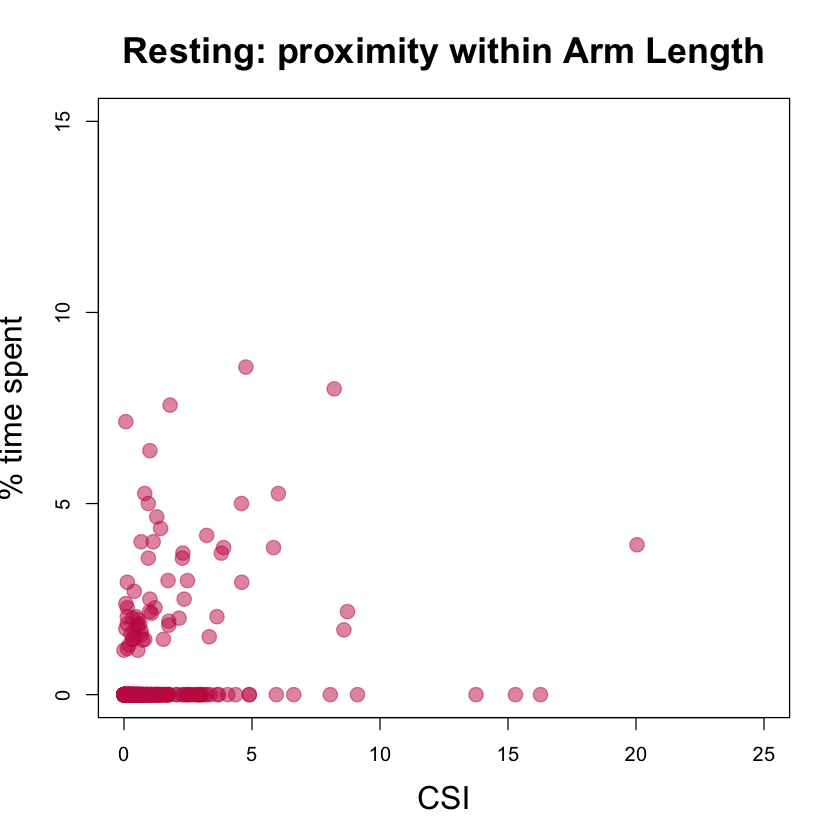

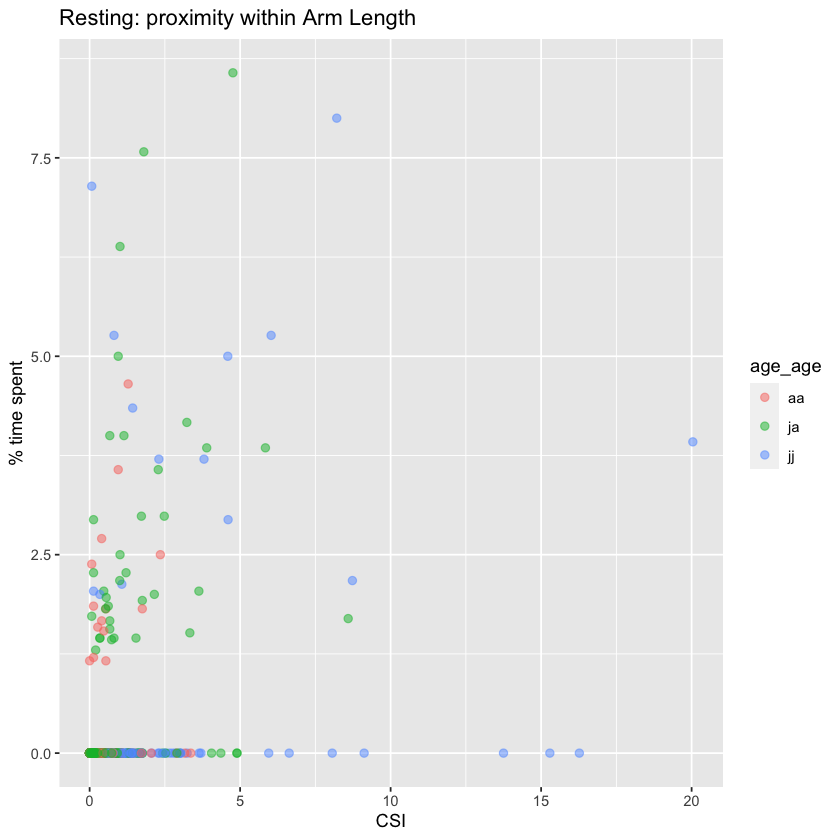

In [38]:
resting$Percent_AL<- with(resting, (Nb_Foc_pt_arm_length/(Nb_Foc_pt_arm_length+Nb_no_al))*100)

plot(Percent_AL~CSI,  resting, col = "#c7225380", main="Resting: proximity within Arm Length", cex.main=1.8, cex=1.6, ylab="% time spent", cex.lab=1.6,pch=19, xlim=c(0,25), ylim=c(0,15))


In [72]:
obs_r<-seq(nrow(resting))
OLRE_rest_bAL<-glmer(cbind(Nb_beyondAL,Nb_non_beyondAL)~CSI+
                      sex_sex+
                      age_age+
                      Group+
                      Rank_diff+
                      (1|ran_Id1)+(1|obs),nAGQ=0,data=resting,family="binomial")

drop1(OLRE_rest_bAL, test="Chisq")

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,1763.978,NA,NA
CSI,1,1767.917,5.9392795,1.480707e-02
sex_sex,2,1760.181,0.2031659,9.034062e-01
age_age,2,1792.917,32.9386662,7.038166e-08
Group,1,1772.379,10.4006335,1.259721e-03
Rank_diff,1,1773.086,11.1083546,8.593970e-04


In [74]:
summary(glht(OLRE_rest_bAL,linfct=mcp(age_age="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_beyondAL, Nb_non_beyondAL) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = resting, family = "binomial", nAGQ = 0)

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)    
ja - aa == 0   0.3391     0.1155   2.935  0.00916 ** 
jj - aa == 0   0.8635     0.1437   6.010  < 0.001 ***
jj - ja == 0   0.5244     0.1151   4.556  < 0.001 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [75]:
summary(glht(OLRE_rest_bAL,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_beyondAL, Nb_non_beyondAL) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = resting, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0  -0.4441     0.1316  -3.375 0.000737 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


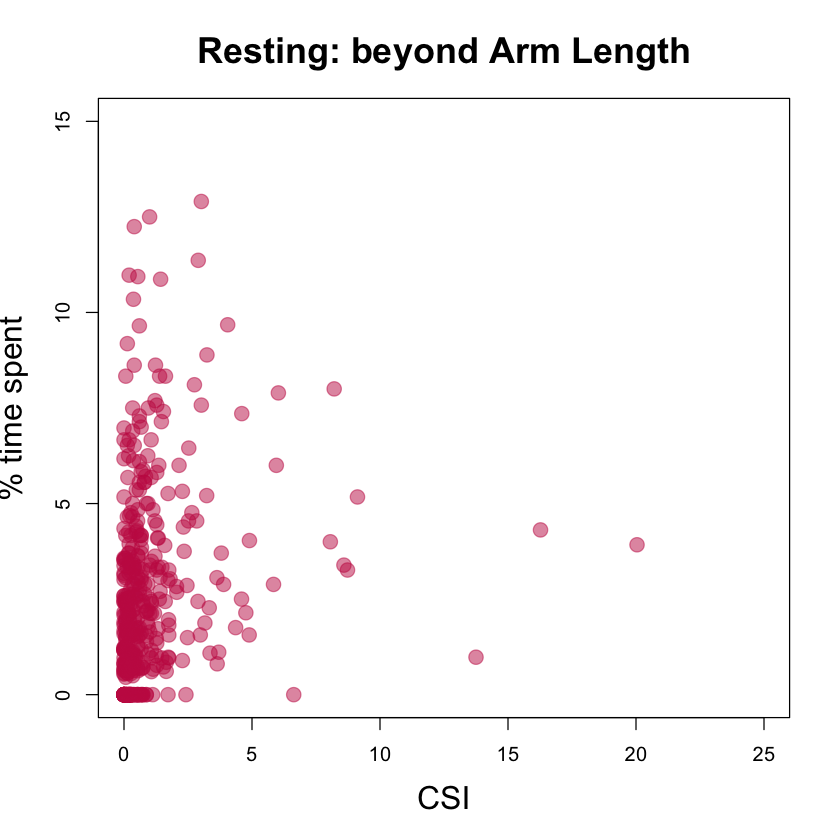

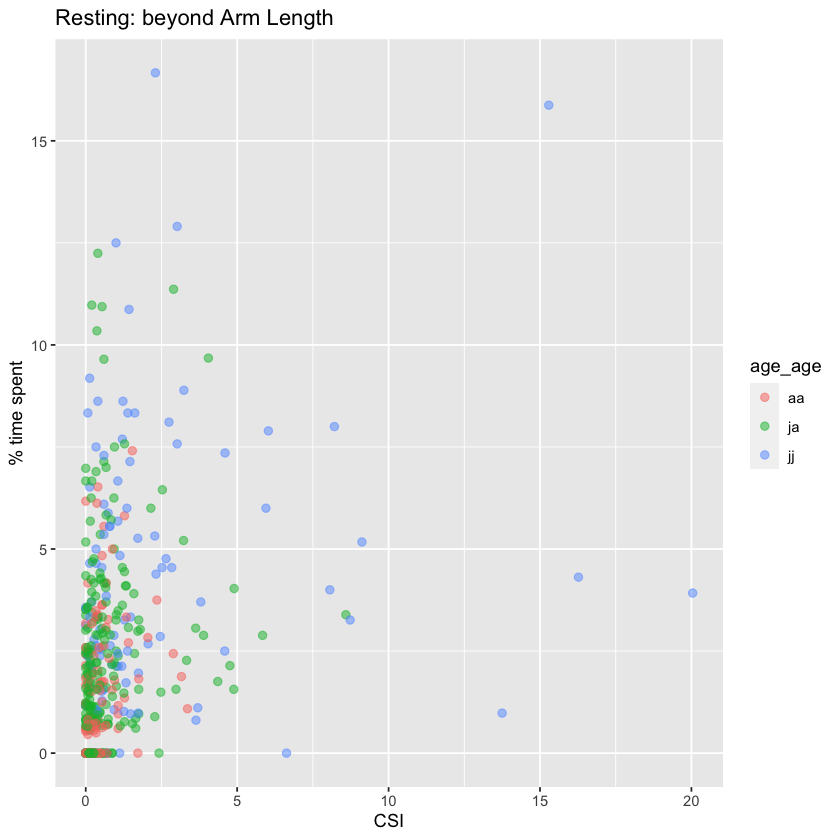

In [44]:

plot(Percent_beyondAL~CSI,  resting, col = "#c7225380", main="Resting: beyond Arm Length", cex.main=1.8, cex=1.6, ylab="% time spent", cex.lab=1.6,pch=19, xlim=c(0,25), ylim=c(0,15))


# points colored by age_age
ggplot(aes(CSI,Percent_beyondAL, color=age_age), data=resting) +
  geom_point(alpha=0.5, size=2) +labs(y="% time spent", x="CSI", title="Resting: beyond Arm Length")



# Resting: nearest neighbor

In [79]:
OLRE_rest_nbr<-glmer(cbind(Nb_Nearest_Id,Nb_no_nbr)~CSI+
                       sex_sex+
                       age_age+
                       Group+
                       Rank_diff+
                       (1|ran_Id1)+(1|obs),nAGQ=0,data=resting,family="binomial")

summary(OLRE_rest_nbr)

overdisp_fun(OLRE_rest_nbr)
Anova(OLRE_rest_nbr,Type="2")
drop1(OLRE_rest_nbr, test="Chisq")

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_Nearest_Id, Nb_no_nbr) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs)
   Data: resting

     AIC      BIC   logLik deviance df.resid 
  1958.1   1998.8   -969.1   1938.1      419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7939 -0.6387  0.0094  0.4634  1.8395 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs     (Intercept) 0.174815 0.41811 
 ran_Id1 (Intercept) 0.004695 0.06852 
Number of obs: 429, groups:  obs, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.872758   0.106850 -17.527  < 2e-16 ***
CSI          0.074934   0.017291   4.334 1.47e-05 ***
sex_sexfm    0.034313   0.074572   0.460  0.64542    
sex_sexmm   -0.116311   0.110318  -1.054  0.29173    
age_ageja   -0.045885   0.078641  -0.583  0.55957  

chisq       ratio         rdf           p 
254.1724762   0.6066169 419.0000000   1.0000000

,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>
CSI,18.7818228,1,1.465573e-05
sex_sex,2.0715691,2,3.549478e-01
age_age,0.3511238,2,8.389855e-01
Group,59.5689868,1,1.180814e-14
Rank_diff,8.2952015,1,3.974997e-03


,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,1958.145,NA,NA
CSI,1,1974.457,18.3111773,1.876032e-05
sex_sex,2,1956.216,2.0702407,3.551836e-01
age_age,2,1954.549,0.4040203,8.170866e-01
Group,1,1997.229,41.0833334,1.458750e-10
Rank_diff,1,1964.658,8.5128282,3.526515e-03


In [80]:
  summary(glht(OLRE_rest_nbr,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Nearest_Id, Nb_no_nbr) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs), 
    data = resting, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0 -0.69813    0.09045  -7.718 1.18e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


# Visualize resting: nearest neighbor~CSI

In [41]:
str(resting)

'data.frame':	429 obs. of  33 variables:
 $ Dyad                      : Factor w/ 429 levels "Aara-Aare","Aara-Amur",..: 43 44 45 46 47 48 49 50 51 52 ...
 $ Group                     : Factor w/ 2 levels "Kubu","Noha": 2 2 2 2 2 2 2 2 2 2 ...
 $ ran_Id1                   : Factor w/ 40 levels "Aara","Aare",..: 5 7 8 5 10 11 13 18 5 5 ...
 $ ran_Id2                   : Factor w/ 40 levels "Aara","Aare",..: 6 5 5 9 5 5 5 5 19 20 ...
 $ Nb_dyad_points            : int  71 47 32 50 39 21 30 35 44 38 ...
 $ Rank_diff                 : int  9 14 13 16 15 11 2 7 5 4 ...
 $ sex_sex                   : Factor w/ 3 levels "ff","fm","mm": 2 2 1 1 1 1 1 1 1 2 ...
 $ age_age                   : Factor w/ 3 levels "aa","ja","jj": 2 2 2 2 3 3 3 3 2 3 ...
 $ same_kin                  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CSI                       : num  0.74 1.01 1.75 0.27 1.21 0.47 1.48 0.34 0.34 0.81 ...
 $ CSI.0.04                  : num  0.78 1.05 1.79 0.31 1.25 0.51 1.52 0.38 0.38 0.85 ...
 $ CSI._L

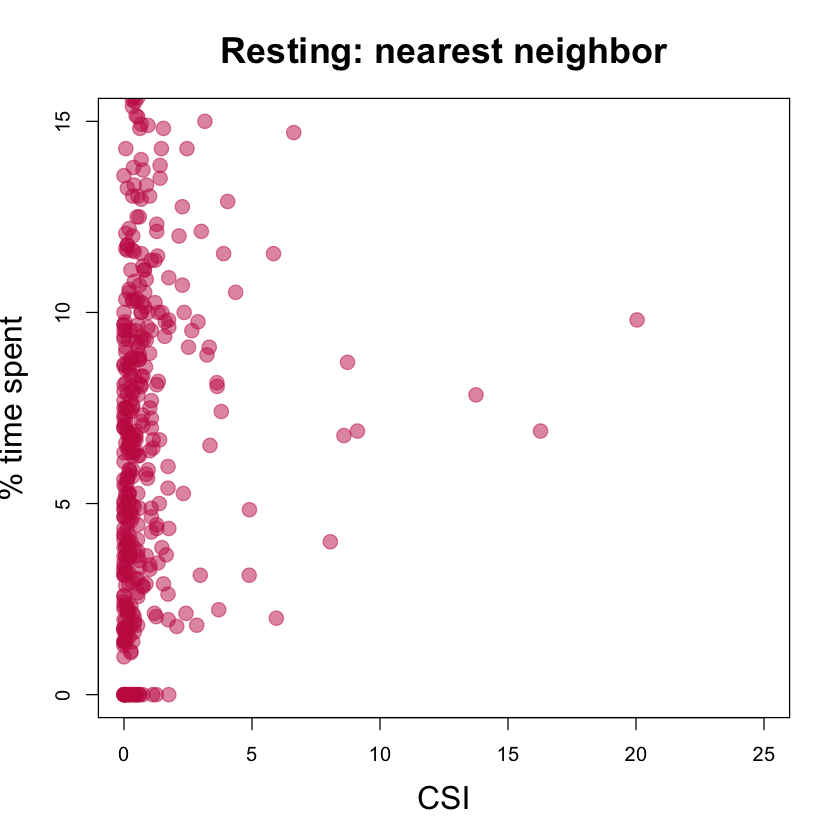

In [43]:
plot(Percent_nbr~CSI,  resting, col = "#c7225380", main="Resting: nearest neighbor", cex.main=1.8, cex=1.6, ylab="% time spent", cex.lab=1.6,pch=19, xlim=c(0,25), ylim=c(0,15))



# Moving

In [81]:
moving <- read.csv(file = '/Volumes/Macintosh HD/Documents/Vervet Monkey/V8_final files/csv files to upload/moving.csv')

ERROR: Error in read.table(file = file, header = header, sep = sep, quote = quote, : more columns than column names


In [82]:
head(moving)

,Dyad,Group,ran_Id1,ran_Id2,Nb_dyad_points,Rank_diff,sex_sex,age_age,same_kin,CSI,⋯,Nb_Nearest_Adult_Neighbour,Nb_Nearest_Juv_Neighbour,Nb_Nearest_Id,Nb_no_nbr,Nb_prox,Nb_non_prox,Prop_prox,Percent_prox,Prop_nbr,Percent_nbr
,<fct>,<fct>,<fct>,<fct>,<int>,<int>,<fct>,<fct>,<int>,<dbl>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Bela-Can,Noha,Can,Bela,48,9,fm,ja,0,0.74,⋯,0,2,2,46,1,143,0.006944444,0.6944444,0.04166667,4.166667
2,Bela-Cus,Noha,Bela,Cus,37,14,fm,ja,0,1.01,⋯,0,0,0,37,1,110,0.009009009,0.9009009,0.00000000,0.000000
3,Bela-Gaya,Noha,Bela,Gaya,47,13,ff,ja,0,1.75,⋯,3,2,5,42,3,138,0.021276596,2.1276596,0.10638298,10.638298
4,Bela-Gene,Noha,Gene,Bela,51,16,ff,ja,0,0.27,⋯,0,3,3,48,1,152,0.006535948,0.6535948,0.05882353,5.882353
5,Bela-Gran,Noha,Gran,Bela,32,15,ff,jj,0,1.21,⋯,0,2,2,30,3,93,0.031250000,3.1250000,0.06250000,6.250000
6,Bela-Guat,Noha,Bela,Guat,37,11,ff,jj,0,0.47,⋯,0,2,2,35,2,109,0.018018018,1.8018018,0.05405405,5.405405


In [83]:
obs_m<-seq(nrow(moving))

OLRE_move_prox<-glmer(cbind(Nb_prox,Nb_non_prox)~CSI+
                       sex_sex+
                       age_age+
                       Group+
                       Rank_diff+
                       (1|ran_Id1)+(1|obs_m),nAGQ=0,data=moving,family="binomial")
overdisp_fun(OLRE_move_prox)

chisq       ratio         rdf           p 
381.5400562   0.9105968 419.0000000   0.9051610

In [85]:
summary(OLRE_move_prox) 

drop1(OLRE_move_prox, test="Chisq")

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs_m)
   Data: moving

     AIC      BIC   logLik deviance df.resid 
  1097.2   1137.8   -538.6   1077.2      419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6183 -0.7851 -0.1802  0.4661  3.5738 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs_m   (Intercept) 0.04643  0.2155  
 ran_Id1 (Intercept) 0.03269  0.1808  
Number of obs: 429, groups:  obs_m, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.926636   0.168990 -23.236  < 2e-16 ***
CSI          0.009403   0.027833   0.338 0.735489    
sex_sexfm    0.087959   0.115489   0.762 0.446284    
sex_sexmm    0.047599   0.187206   0.254 0.799295    
age_ageja    0.276726   0.140748   1.966 0.049287 * 

,npar,AIC,LRT,Pr(Chi)
,<dbl>,<dbl>,<dbl>,<dbl>
<none>,NA,1097.219,NA,NA
CSI,1,1095.331,0.1118460,7.380522e-01
sex_sex,2,1093.800,0.5806272,7.480289e-01
age_age,2,1105.724,12.5044053,1.926207e-03
Group,1,1129.699,34.4796142,4.307391e-09
Rank_diff,1,1104.695,9.4753568,2.082504e-03


In [87]:
summary(glht(OLRE_move_prox,linfct=mcp(age_age="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs_m), 
    data = moving, family = "binomial", nAGQ = 0)

Linear Hypotheses:
             Estimate Std. Error z value Pr(>|z|)   
ja - aa == 0   0.2767     0.1407   1.966  0.11829   
jj - aa == 0   0.5900     0.1655   3.566  0.00101 **
jj - ja == 0   0.3133     0.1258   2.490  0.03340 * 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [88]:
summary(glht(OLRE_move_prox,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_prox, Nb_non_prox) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs_m), 
    data = moving, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0  -0.9939     0.1318  -7.543  4.6e-14 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)


In [89]:
r.squaredGLMM(OLRE_move_prox)


Warning message:
“The null model is correct only if all variables used by the original model remain unchanged.”


,R2m,R2c
theoretical,0.7155326,0.9144033
delta,0.2455400,0.3137839


# Moving : nearest Neighbor

In [92]:
obs_m<-seq(nrow(moving))

OLRE_move_nbr<-glmer(cbind(Nb_Nearest_Id,Nb_no_nbr)~CSI+
                        sex_sex+
                        age_age+
                        Group+

                        Rank_diff+
                        (1|ran_Id1)+(1|obs_m),nAGQ=0,data=moving,family="binomial")
overdisp_fun(OLRE_move_nbr)

summary(OLRE_move_nbr) 

chisq       ratio         rdf           p 
314.0810373   0.7495967 419.0000000   0.9999621

Generalized linear mixed model fit by maximum likelihood (Adaptive
  Gauss-Hermite Quadrature, nAGQ = 0) [glmerMod]
 Family: binomial  ( logit )
Formula: cbind(Nb_Nearest_Id, Nb_no_nbr) ~ CSI + sex_sex + age_age + Group +  
    Rank_diff + (1 | ran_Id1) + (1 | obs_m)
   Data: moving

     AIC      BIC   logLik deviance df.resid 
  1588.3   1628.9   -784.2   1568.3      419 

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.6471 -0.6623 -0.1274  0.4970  3.3219 

Random effects:
 Groups  Name        Variance Std.Dev.
 obs_m   (Intercept) 0.1345   0.3668  
 ran_Id1 (Intercept) 0.0000   0.0000  
Number of obs: 429, groups:  obs_m, 429; ran_Id1, 40

Fixed effects:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.684063   0.114800 -14.670   <2e-16 ***
CSI          0.034185   0.021225   1.611   0.1073    
sex_sexfm   -0.115450   0.082302  -1.403   0.1607    
sex_sexmm   -0.180352   0.132738  -1.359   0.1742    
age_ageja   -0.106926   0.091922  -1.163   0.244

In [93]:
summary(glht(OLRE_move_nbr,linfct=mcp(Group="Tukey")))



	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: glmer(formula = cbind(Nb_Nearest_Id, Nb_no_nbr) ~ CSI + sex_sex + 
    age_age + Group + Rank_diff + (1 | ran_Id1) + (1 | obs_m), 
    data = moving, family = "binomial", nAGQ = 0)

Linear Hypotheses:
                 Estimate Std. Error z value Pr(>|z|)    
Noha - Kubu == 0 -0.80423    0.09543  -8.427   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
(Adjusted p values reported -- single-step method)
